In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
price_by_zip_code = pd.read_csv('price_by_zip_code.csv', sep=';', header=-1)

In [3]:
price_by_zip_code.columns = ['zip_code', 'average_price', 'median_price', 'per_metr', 'popularity']

In [4]:
zip_code_dict = price_by_zip_code.set_index('zip_code').to_dict()

In [5]:
with open('zip_code_dict.pickle', 'wb') as f:
    pickle.dump(zip_code_dict, f)

In [6]:
price_by_zip_code['per_metr'] = price_by_zip_code['per_metr'].apply(lambda x : x[1:].replace(',', '')).astype(int)
price_by_zip_code['average_price'] = price_by_zip_code['average_price'].apply(lambda x : x[1:].replace(',', '')).astype(int)
price_by_zip_code['median_price'] = price_by_zip_code['median_price'].apply(lambda x : x[1:].replace(',', '')).astype(int)

In [ ]:
for i in range(1, 100):
    page_info_list = ''

In [152]:
page_string = 'https://www.domofond.ru/prodazha-kvartiry-sankt_peterburg-c3414?Page=2' 
r = requests.get(page_string)

In [160]:
from time import sleep

In [161]:
sleep(0.5)

In [188]:
page_htmls = []

In [203]:
for i in range(501, 1000):
    page_string = 'https://www.domofond.ru/prodazha-kvartiry-sankt_peterburg-c3414?Page='+str(i) 
    r = requests.get(page_string)
    page_htmls.append(r.text)
    sleep(0.5)

In [204]:
flats_df = pd.DataFrame(index=[i for i in range(100000)], columns=['address', 'price'])

In [205]:
for page in page_htmls:
    bs = BeautifulSoup(page)
    for flat in bs.find_all('a', {'itemprop': 'sameAs'}):
        if flat.find('span', {'itemprop': 'address'}):
            flats_df.iloc[i, 0] = flat.find('span', {'itemprop': 'address'}).get_text()
        if flat.find('div', {'class': 'e-price-breakdown'}):
            flats_df.iloc[i, 1] = flat.find('div', {'class': 'e-price-breakdown'}).get_text()
        i += 1

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [207]:
flats_df = flats_df.dropna()

In [237]:
flats_df.to_csv('price_final.csv', index=False)

In [231]:
flats_df['price'].values[0][3]

'\xa0'

In [236]:
flats_df['price'] = flats_df['price'].apply(lambda x: int(''.join(x[:7].split('\xa0'))))

In [242]:
flats_df['len'] = flats_df['address'].apply(lambda x: len(x.split(', ')))

In [251]:
flats_df.iloc[24, :]

address    Салова ул., Волковское, Санкт-Петербург
price                                        94860
len                                              3
Name: 1026, dtype: object

In [252]:
flats_df['address'] = flats_df['address'].apply(lambda x: x.split(', '))

In [277]:
def help_1(x):
    for el in x:
        if ('ул ' in el) or ('ул.' in el) or ('пр. ' in el) or ('аллея' in el) or ('дорога' in el) or ('шоссе' in el) or ('проспект' in el) or ('улица' in el):
            return el
    return None

In [278]:
flats_df['address'][:30].apply(lambda x: help_1(x))

999                 Савушкина ул.
1000             Муринская дорога
1001             Муринская дорога
1002          Московский проспект
1003             Московское шоссе
1004                  ул Чекистов
1005             Московское шоссе
1006        Нижне-Каменская улица
1007           Михайловская улица
1009       Комендантский проспект
1010          Новолитовская улица
1011    Ланское шоссе д.14 корп.1
1012        Вознесенский пр. д.41
1013    Ланское шоссе д.14 корп.1
1015                         None
1016                         None
1017                         None
1018                         None
1019              аллея Охтинская
1020           Лиговский проспект
1022    пр. Александровской Фермы
1023                ул. Уральская
1024                         None
1025             Муринская дорога
1026                   Салова ул.
1027               Красуцкого ул.
1028                         None
1029            ул. Кременчугская
1030            ул. Кременчугская
1031          

In [267]:
'ул.' in flats_df.iloc[0,:][0][0]

True

In [479]:
houses_df

,street,Home,raion,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat,price,street_name,extrapolate_price,final_price
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715,-0.071891,Лени Голикова,"([109848, 110350, 116209, 115625, 116278, 1148...",115842.000000
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236,0.404150,Среднегаванский,"([], [107018])",107018.000000
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927,-0.309632,Рашетова,"([], [106018, 105161])",105589.500000
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446,0.721086,Сердобольская,"([], [123684, 121795, 93023, 107500, 100000, 1...",112010.454545
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112,-0.343588,Флотская,"([57410, 74564], [71333, 77083, 77857])",65987.000000
5,Флотская ул.,5,Кронштадский,121.0,1973,Индивидуальный,3885.600098,5.0,3.0,30.473965,60.059112,-0.343588,Флотская,"([77083], [57410, 71333, 74564, 77857])",77083.000000
6,Лени Голикова ул.,49,Кировский,194.0,1967,Г-3,3701.899902,5.0,7.0,30.234920,59.840552,-0.071891,Лени Голикова,"([], [88000, 104943, 86667, 82474, 80488, 9759...",106364.840000
7,Димитрова ул.,31,Фрунзенский,1321.0,1981,137,40146.800781,12.0,9.0,30.409150,59.851188,0.387372,Димитрова,"([87719], [113636, 90065, 120482, 93750, 10608...",87719.000000
8,Шателена ул.,2,Выборгский,103.0,1961,1-528-КП-99,2783.000000,5.0,3.0,30.364329,60.001551,-0.309632,Шателена,"([], [115806])",115806.000000
9,Шателена ул.,16,Выборгский,113.0,1960,Индивидуальный,2731.000000,5.0,3.0,30.360563,60.004269,-0.309632,Шателена,"([115806], [])",115806.000000


In [279]:
flats_df.head(10)

,address,price,len,street
999,"[Савушкина ул., Чёрная речка, Санкт-Петербург]",163899,3,None
1000,"[Муринская дорога, 84, Полюстрово, Санкт-Петер...",52857,4,None
1001,"[Муринская дорога, 80к1, Полюстрово, Санкт-Пет...",54091,4,None
1002,"[Московский проспект, 83В, Измайловское округ,...",106768,4,None
1003,"[Московское шоссе, 23к2В, Звёздное, Санкт-Пете...",82453,4,None
1004,"[ул Чекистов, 44, Сосновая поляна, Санкт-Петер...",66000,4,None
1005,"[Московское шоссе, 23АЮ, Звёздное, Санкт-Петер...",77517,4,None
1006,"[Нижне-Каменская улица, 1, Юнтолово, Санкт-Пет...",66038,4,None
1007,"[Михайловская улица, 10/2, Ломоносов, Санкт-Пе...",48485,4,None
1009,"[Комендантский проспект, 53к1, Коломяги, Санкт...",64000,4,None


In [296]:
flats_df['address'] = flats_df['address'].apply(lambda x: ', '.join(x))

In [281]:
lst = [0, 1, 2, 3]

In [282]:
lst[:-1]

[0, 1, 2]

In [288]:
houses_df['street_name'] = houses_df['street'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [291]:
houses_df.rename(columns={'Дом': 'Home'}, inplace=True)

In [298]:
def help_2(home, street):
    home_prices = []
    street_prices = []
    for el, pr in zip(flats_df['address'].values, flats_df['price']):
        if (home in el) and (street in el):
            home_prices.append(pr)
        elif street in el:
            street_prices.append(pr)
    return (home_prices, street_prices)

In [301]:
houses_df['extrapolate_price'] = houses_df.apply(lambda x: help_2(x.Home, x.street_name), axis=1)

In [303]:
def help_3(price_tuple):
    if len(price_tuple[0]) != 0:
        return np.array(price_tuple[0]).mean()
    elif len(price_tuple[1]) != 0:
        return np.array(price_tuple[1]).mean()
    else:
        return None

In [304]:
houses_df['final_price'] = houses_df['extrapolate_price'].apply(lambda x: help_3(x))

In [308]:
sum(houses_df['final_price'].isnull())

2353

In [309]:
houses_df.shape

(17197, 15)

In [480]:
final_dataset = pd.read_csv('all_feat_data.csv').drop(['Unnamed: 0', 'lon', 'lat', 'location'], axis=1)

In [481]:
final_dataset['price'] = houses_df['final_price']

In [482]:
final_dataset.head()

,crime,complain,educ_dist,rest_dist,infrastr_dist,med_dist,shops_dist,food_retail,rest,educ,infrastr,med,district_year,year,floors,price
0,0.679315,1.117699,0.009675,0.003157,0.002949,0.003971,0.001185,1.387198,0.315501,-0.693321,0.909674,0.475634,0.745862,0.630134,-0.280710,115842.000000
1,0.910500,1.172718,0.000584,0.001834,0.002258,0.000570,0.001469,1.497607,1.029705,2.453418,1.205592,1.242706,0.160107,-0.916830,0.038097,107018.000000
2,0.910500,1.223731,0.002645,0.003006,0.003789,0.002193,0.001710,-1.130144,-1.081087,-0.693321,-0.933382,-1.058509,0.642959,0.583256,0.994515,105589.500000
3,0.910500,1.240615,0.006782,0.002118,0.006692,0.007717,0.000950,1.304445,1.080010,0.157048,1.068238,1.373051,0.133722,-0.565247,-0.280710,112010.454545
4,-1.318550,-1.798249,0.048342,0.005432,0.014119,0.001383,0.002467,0.478818,-0.000539,-0.693321,-0.933382,-0.291438,-0.642007,-0.940269,-0.918322,65987.000000


In [483]:
final_dataset.dropna(inplace=True)

In [485]:
X['Y'] = Y_final

In [484]:
X = final_dataset.iloc[:, :-1]
Y = final_dataset['price']

In [344]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [358]:
lasso = Lasso(alpha=100)
ridge = Ridge(alpha=100)
lr = LinearRegression()
lr.fit(X, Y)
lasso.fit(X, Y)
ridge.fit(X, Y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [369]:
Y_log = np.log(Y)
mean_ = Y_log.mean() 
std_ = Y_log.std()

In [370]:
Y_final = (Y_log - Y_log.mean()) / Y_log.std()

In [374]:
from scipy.spatial.distance import cosine

In [ ]:
cosine()

In [ ]:
Y_

In [469]:
X = Y_final

In [486]:
X_train = X[:10]
X_test = X[10:]

In [502]:
np.corrcoef(np.array(cos1).reshape(1, -1), np.array(pr1).reshape(1, -1))

array([[ 1.       ,  0.0647957],
       [ 0.0647957,  1.       ]])

In [501]:
cos1 = []
pr1 = []
for x in X_train.values:
    r1, r2 = get_lalal(x[:15], X_test, x[15])
    cos1.append(r1) 
    pr1.append(r2)

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [496]:
def get_lalal(x, X_test, y):
    cosines = []
    prices = []
    for el in X_test.values:
        cosines.append(cosine(changed_coefs * x, changed_coefs * el[:15]))
        prices.append(abs(y - el[15]))
    X_test['cosines'] = cosines
    X_test['prices'] = prices
    X_test.sort_values(by='cosines', inplace=True)
    return X_test['cosines'][:10], X_test['prices'][:10]

In [446]:
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import norm
mms = MinMaxScaler()

In [500]:
changed_coefs = mms.fit_transform(abs(lr.coef_))

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [407]:
buf1 = np.array([i for i in range(len(lr.coef_))])
buf2 = np.array([i for i in range(1, len(lr.coef_)+1)])

In [408]:
norm(changed_coefs * (buf1 - buf2))

2.9409636692473518

In [ ]:
for i in range()

In [425]:
cosines = []
prices = []
for i in range(len(X_train)):
    for j in range(len(X_test)):
        cosines.append(cosine(X_train[i], X_test[j]))
        prices.append(abs(Y_train[i] - Y_test[j]))

In [388]:
from numpy import corrcoef

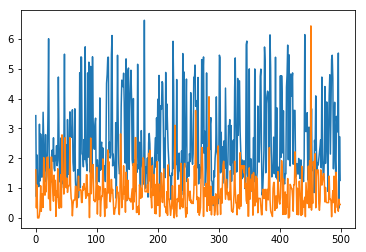

In [411]:
plt.plot([i for i in range(len(cosines[:500]))], cosines[:500])
plt.plot([i for i in range(len(prices[:500]))], prices[:500])

In [429]:
X['Y'] = Y

In [ ]:
def top_ten(example, dataset, Y_example):
    dataset = 
    for i in range(len(dataset)):
        

In [426]:
corrcoef(np.array(cosines), np.array(prices))

array([[ 1.        ,  0.21499497],
       [ 0.21499497,  1.        ]])

(array([  4.00000000e+00,   2.30000000e+01,   8.90000000e+01,
          3.36000000e+02,   1.24200000e+03,   2.47500000e+03,
          3.78200000e+03,   1.78600000e+03,   1.19900000e+03,
          6.11000000e+02,   2.47000000e+02,   1.91000000e+02,
          1.38000000e+02,   4.30000000e+01,   4.60000000e+01,
          1.10000000e+01,   1.30000000e+01,   6.00000000e+00,
          3.00000000e+00,   2.00000000e+00]),
 array([-3.53914001, -3.01838337, -2.49762673, -1.97687009, -1.45611344,
        -0.9353568 , -0.41460016,  0.10615648,  0.62691312,  1.14766976,
         1.6684264 ,  2.18918304,  2.70993968,  3.23069632,  3.75145296,
         4.27220961,  4.79296625,  5.31372289,  5.83447953,  6.35523617,
         6.87599281]),
 <a list of 20 Patch objects>)

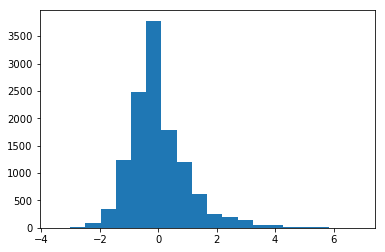

In [371]:
plt.hist(Y_final, bins=20)

In [361]:
cross_val_score(lasso, X, Y, cv=5).mean()

-0.0015747583658300534

In [379]:
pd.DataFrame(data = [lr.coef_], columns=X.columns)

,crime,complain,educ_dist,rest_dist,infrastr_dist,med_dist,shops_dist,food_retail,rest,educ,infrastr,med,district_year,year,floors
0,-185.981274,-496.504043,4463.0672,-90488.746154,17967.770405,65445.86817,-232179.620967,-197.480742,-117.572274,-524.542758,994.698158,272.728456,246.158652,281.547484,-588.499321


In [340]:
list(lr.coef_)

[-185.98127410797412,
 -496.50404262747242,
 4463.0671999140741,
 -90488.746154403532,
 17967.770405314172,
 65445.868169771646,
 -232179.62096730791,
 -197.48074203595388,
 -117.57227430396597,
 -524.54275810861145,
 994.69815824830584,
 272.72845575085375,
 246.15865238294646,
 281.54748405786813,
 -588.49932082631858]

In [169]:
import re

In [151]:
flats_dataset = pd.DataFrame(index=[i for i in range(200000)], columns=['address', 'price_per_metr'])

In [8]:
i = 0
for j in range(2, 400):
    page_string = 'https://www.domofond.ru/prodazha-kvartiry-sankt_peterburg-c3414?Page='+str(j)
    r = requests.get(page_string)
    bs = BeautifulSoup(r.text)
    for flat in bs.find_all('ul', {'class': 'mainlist'}):
        if flat.find_all('li')[1].find('a').get('href')[:50] == 'http://realty.dmir.ru/sale/kvartira-sanktpeterburg':
            flats_dataset.iloc[i, 0] = flat.find_all('li')[1].find('a').get_text()
            flats_dataset.iloc[i, 1] = flat.find_all('li')[0].find('span', {'class': 'tag'}).get('title')
            i += 1

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


ConnectionError: HTTPConnectionPool(host='realty.dmir.ru', port=80): Max retries exceeded with url: /spb/sale/prodazha-kvartir-v-sankt-peterburge/?page=249 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000021BA0ACD780>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера',))

In [9]:
flats_dataset.dropna().shape

(9471, 2)

In [11]:
flats_dataset = flats_dataset.dropna().drop_duplicates()

In [12]:
flats_dataset.to_csv('flats_price_dataset.csv', index=False)

In [13]:
houses_df = pd.read_csv('data/OpenData/houses.csv')

In [14]:
def if_in(x):
    if 'Рашетова' in x:
        return True
    else:
        return False

In [16]:
print (flats_dataset['address'][0].find('проспект'))

18


In [52]:
def get_street(x):
    result = x.split(', ')[1].split(' ')
    resultwords = [word for word in result if word.lower() not in ['улица', 'проспект', 'набережная']]
    if len(resultwords) == 1:
        return resultwords[0]
    else:
        return ' '.join(resultwords)

In [53]:
def get_home_number(x):
    result = x.split(',')
    if len(result) < 3:
        return -1
    else:
        return result[2]

In [54]:
flats_dataset['street'] = flats_dataset['address'].apply(lambda x: get_street(x))
flats_dataset['home_number'] = flats_dataset['address'].apply(lambda x: get_home_number(x))

In [72]:
flats_dataset['short_address'] = flats_dataset['address'].apply(lambda x: ', '.join(x.split(', ')[1:]))

In [57]:
sum(flats_dataset['street'] == 'Песочная')

2

In [99]:
area_price_map = { 'Адмиралтейский': 121502.6,
                    'Василеостровский': 123161.7,
                    'Выборгский': 101051.8,
                    'Калининский': 96447.9,
                    'Кировский': 95880.6,
                    'Красногвардейский': 96321.2,
                    'Красносельский': 91633.8,
                    'Московский': 119403.4,
                    'Невский': 91400.6,
                    'Петроградский': 156567.5,
                    'Приморский': 108768.2,
                    'Фрунзенский': 96535.8,
                    'Центральный': 141235.2,
                    'Всеволожский': 77888.0,
                    'Колпинский': 70230.5,
                    'Кронштадтский': 77617.1,
                    'Курортный': 91507.6,
                    'Петродворцовый': 79013.9,
                    'Пушкинский': 84666.1}

In [100]:
houses_df.head()

,Улица,Дом,Район,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112


In [123]:
flats_dataset['price_per_metr'] = flats_dataset['price_per_metr'].apply(lambda x: int(''.join(x[0:7].split(' '))))

In [124]:
def get_prices_from_street(x):
    prices = []
    for street, price in zip(flats_dataset['street'], flats_dataset['price_per_metr']):
        if street in x:
            prices.append(price)
    if len(prices) == 0:
        return None
    else:
        return np.array(prices).mean()

In [126]:
houses_df['price'] = houses_df['Улица'].apply(lambda x: get_prices_from_street(x)) 

In [128]:
houses_df['price'] = houses_df['price'].fillna(0)

In [ ]:
houses_df['price'].apply()

In [131]:
houses_df.rename(columns={'Улица': 'street', 'Район': 'raion'}, inplace=True)

In [136]:
def fill_na_price(raion, price):
    if price != 0:
        return price
    else:
        if raion in area_price_map:
            return area_price_map[raion]
        else:
            return 100000

In [138]:
houses_df['price'] = houses_df.apply(lambda x: fill_na_price(x.raion, x.price), axis=1)

In [150]:
houses_df['price'].to_csv('prices.csv', index=False)

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()
scaler.fit(houses_df['price'])
houses_df['price'] = scaler.transform(houses_df['price'])

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [146]:
houses_df = houses_df[(houses_df.lng < 31.1) & (houses_df.lng > 29.6)]
houses_df = houses_df[(houses_df.lat < 60.12) & (houses_df.lat > 59.7)]
houses_df = houses_df.dropna()

In [149]:
houses_df.head()

,street,Дом,raion,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat,price
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715,-0.071891
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236,0.404150
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927,-0.309632
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446,0.721086
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112,-0.343588


In [147]:
houses_df.shape

(17197, 12)

(array([  1.20000000e+01,   1.80000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.90000000e+01,   2.80000000e+01,   5.82000000e+02,
          2.18000000e+02,   2.45000000e+02,   8.28000000e+02,
          1.84000000e+02,   9.60000000e+02,   3.62000000e+02,
          1.26100000e+03,   5.07000000e+02,   2.17500000e+03,
          6.07000000e+02,   8.92000000e+02,   5.24000000e+02,
          5.48000000e+02,   2.77000000e+02,   4.48000000e+02,
          6.20000000e+01,   5.75000000e+02,   1.79300000e+03,
          1.34000000e+02,   1.84000000e+02,   1.28000000e+02,
          2.72000000e+02,   2.03000000e+02,   2.38000000e+02,
          1.12600000e+03,   1.15000000e+02,   7.40000000e+01,
          1.48000000e+02,   6.50000000e+01,   5.52000000e+02,
          1.12000000e+02,   2.70000000e+01,   2.60000000e+01,
          9.00000000e+00,   7.80000000e+01,   5.30000000e+01,
        

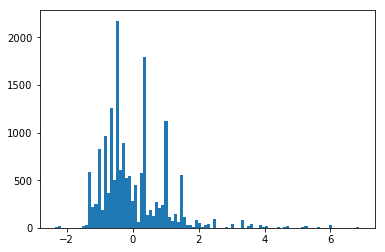

In [148]:
plt.hist(houses_df['price'], bins=100)

In [61]:
get_prices_from_street(houses_df['Улица'][30])

['127 451 руб./м2\n                ',
 '146 226 руб./м2\n                ',
 '128 350 руб./м2\n                ']

In [98]:
requests.get('https://maps.googleapis.com/maps/api/geocode/json?address='+'улица Нахимова, 21'+\
                        ', Санкт-Петербург, Россия').json()['results']

[]

In [89]:
flats_dataset['short_address'][0]

'проспект Королева, 71к1'

In [87]:
flats_dataset['short_address'][:30].apply(lambda n: requests.get('https://maps.googleapis.com/maps/api/geocode/json?address='+n+\
                        ', Санкт-Петербург, Россия').json()['results'])

0     []
1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
14    []
15    []
16    []
17    []
18    []
19    []
20    []
21    []
22    []
23    []
24    []
25    []
26    []
27    []
28    []
29    []
Name: short_address, dtype: object